In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns

In [2]:
data = pd.read_csv("StudentsPerformance.csv")

In [3]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


I must change the column names.

In [5]:
data.rename(columns = {'parental level of education':'parentEducation', 
                       'test preparation course':'testCourse', 
                       'math score':'mathScore',
                       'reading score':'readingScore', 
                       'writing score':'writingScore',
                        'race/ethnicity': 'race'}, inplace=True)

In [6]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Firstly we are looking for descriptive statistics with pandas profil report. There ise no null data. Correlations between scores does not surprise me. We will learn more about grouping operations and visualization operations. I want to get the average score of each student for a few operations.I don't think this will be a problem since there is a correlation between the scores.


In [7]:
data['score'] = ((data['mathScore']+ data['readingScore'] + data['writingScore'])/ 3)

In [8]:
data.head(5)

,gender,race,parentEducation,lunch,testCourse,mathScore,readingScore,writingScore,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [9]:
data.groupby(['race', 'parentEducation'])['score'].mean()

race     parentEducation   
group A  associate's degree    63.880952
         bachelor's degree     67.861111
         high school           61.277778
         master's degree       63.333333
         some college          64.888889
         some high school      59.861111
group B  associate's degree    67.975610
         bachelor's degree     71.300000
         high school           61.500000
         master's degree       74.833333
         some college          64.378378
         some high school      64.289474
group C  associate's degree    69.376068
         bachelor's degree     73.241667
         high school           62.328125
         master's degree       69.035088
         some college          67.806763
         some high school      63.156463
group D  associate's degree    69.333333
         bachelor's degree     69.869048
         high school           63.477273
         master's degree       76.478261
         some college          70.437811
         some high school    

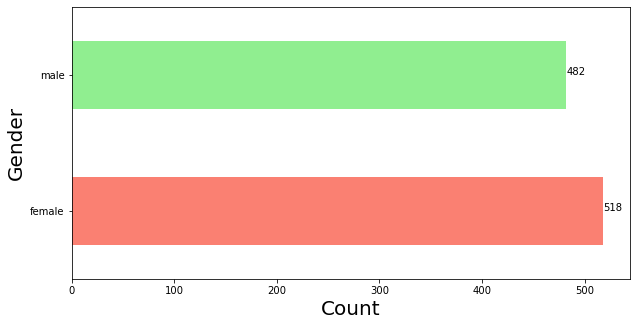

In [10]:
plt.figure(figsize=(10,5))
data.gender.value_counts().plot(kind='barh',color=['salmon', 'lightgreen'])
plt.xlabel('Count', fontsize=20)
plt.ylabel('Gender', fontsize=20)
y = data.gender.value_counts()

for index, count in enumerate(y):
    plt.text(count, index,
             str(count))

C:\Users\mseli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mseli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mseli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

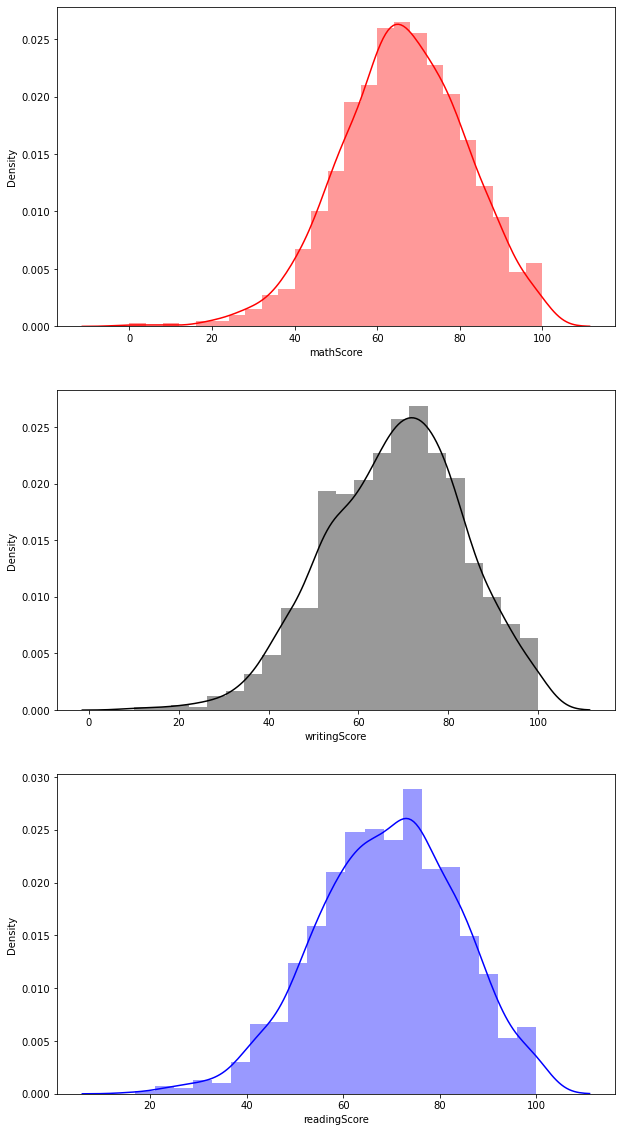

In [11]:
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
sns.distplot(data['mathScore'], color='red');
plt.subplot(3,1,2)
sns.distplot(data['writingScore'],color='black')
plt.subplot(3,1,3)
sns.distplot(data['readingScore'], color='blue')

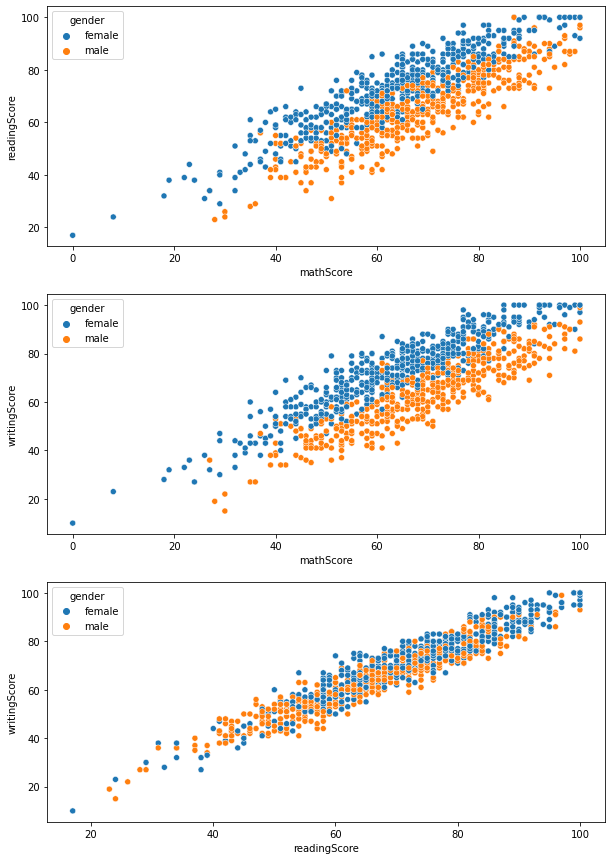

In [12]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.scatterplot(x='mathScore', y="readingScore", hue='gender', data=data)
plt.subplot(3,1,2)
sns.scatterplot(x='mathScore', y='writingScore', hue='gender', data=data)
plt.subplot(3,1,3)
sns.scatterplot(x='readingScore', y='writingScore', hue='gender', data=data)

I can tell by looking at the visualization that women are generally more successful than men.

In [13]:
group_data = data.groupby('race')["mathScore", "readingScore", "writingScore"].mean().round()

<ipython-input-13-957de0541660>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_data = data.groupby('race')["mathScore", "readingScore", "writingScore"].mean().round()


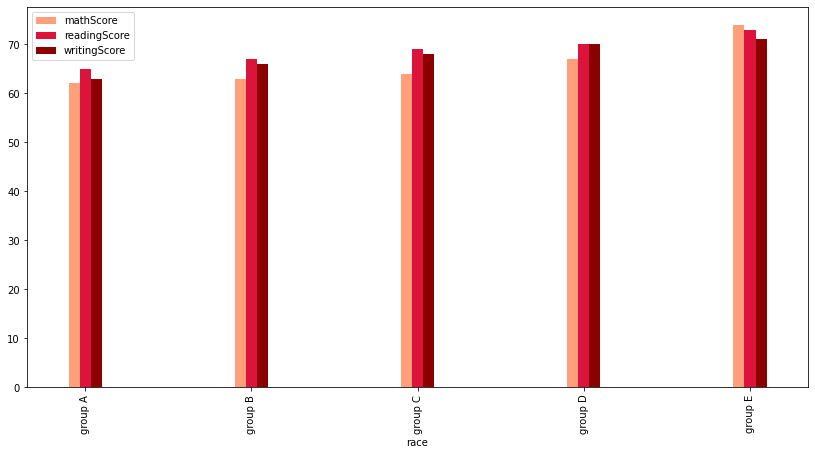

In [14]:
group_data.plot(kind='bar', figsize=(14, 7), color=['LightSalmon','Crimson','DarkRed'],width=0.2)

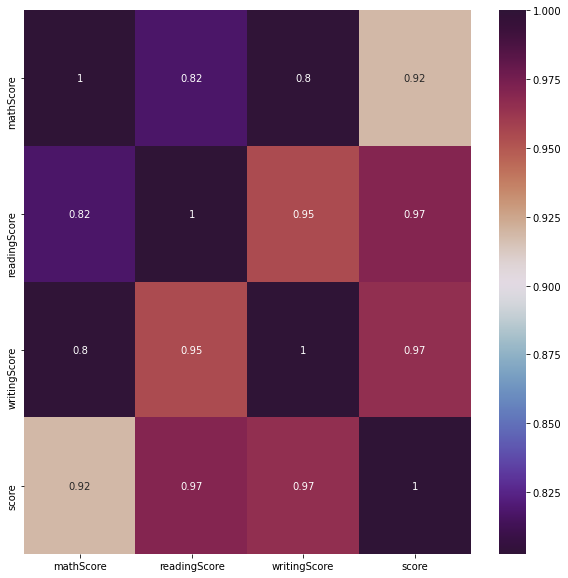

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='twilight_shifted')

In [16]:
data['race'] = data.race.astype('category')
data['gender'] = data.gender.astype('category')
data['parentEducation'] = data.parentEducation.astype('category')
data['testCourse'] = data.testCourse.astype('category')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
data["race"] = le.fit_transform(data["race"])
data["gender"] = le.fit_transform(data["gender"])
data["parentEducation"] = le.fit_transform(data["parentEducation"])
data["testCourse"] = le.fit_transform(data["testCourse"])
data["lunch"] = le.fit_transform(data["lunch"])

In [19]:
data.head()

,gender,race,parentEducation,lunch,testCourse,mathScore,readingScore,writingScore,score
0,0,1,1,1,1,72,72,74,72.666667
1,0,2,4,1,0,69,90,88,82.333333
2,0,1,3,1,1,90,95,93,92.666667
3,1,0,0,0,1,47,57,44,49.333333
4,1,2,4,1,1,76,78,75,76.333333


In [20]:
score = data["score"]

In [21]:
data = data.drop(["score"], axis = 1)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data, score, test_size = 0.30)

In [24]:
from sklearn.ensemble import RandomForestRegressor
rcr = RandomForestRegressor(random_state = 42)

In [25]:
rcr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [26]:
y_pred= rcr.predict(x_test)

In [27]:
np.sqrt(((y_pred - y_test) ** 2).mean())

0.7329320619316689

In [28]:
print("Train Accuracy:",rcr.score(x_train, y_train))
print("Test Accuracy:",rcr.score(x_test, y_test))

Train Accuracy: 0.999222006840428
Test Accuracy: 0.9973751620897964
